## Task - 2 (K-Means Clustering)

#### Importing important libraries

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [127]:
## loading the dataset using pandas read_csv method
df = pd.read_csv(r"C:\Users\91902\Downloads\Customer Churn.csv")
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [170]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Drop the target variable for the features
features = df.drop(columns=['Churn'])
features

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Cluster
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,1
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,1
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [171]:
# Extract the target variable
target = df['Churn']
target

0       0
1       0
2       0
3       0
4       0
       ..
3145    0
3146    0
3147    0
3148    0
3149    1
Name: Churn, Length: 3150, dtype: int64

In [173]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 0.05122913, -0.2878304 ,  0.63672633, ..., -0.11307444,
        -0.52875851, -0.74123838],
       [-1.05028466, -0.2878304 ,  0.75338358, ..., -0.67934551,
        -0.82203616, -0.74123838],
       [ 0.32660758, -0.2878304 ,  0.52006909, ..., -0.11307444,
         2.0612852 ,  1.34909366],
       ...,
       [ 0.73967525, -0.2878304 , -1.6964185 , ..., -0.11307444,
        -0.36881527, -0.74123838],
       [-0.08646009, -0.2878304 , -2.51301919, ..., -0.11307444,
         1.17358857, -0.74123838],
       [ 0.05122913,  3.47426818, -2.51301919, ..., -0.11307444,
        -0.71632621, -0.74123838]])

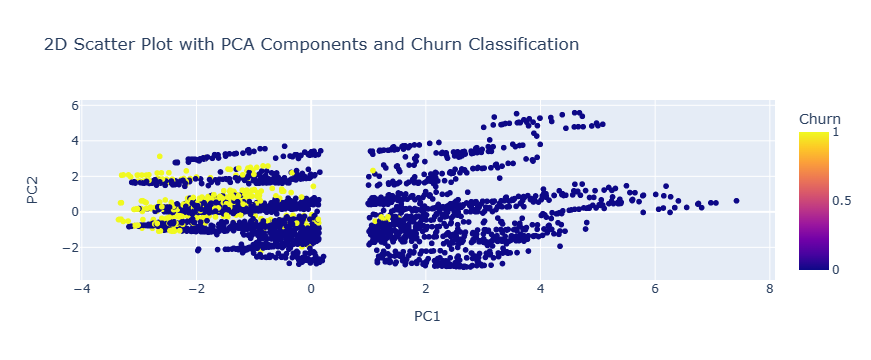

In [174]:
# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2, )
features_pca = pca.fit_transform(features_scaled)

# Create a new DataFrame with the PCA results and the target variable
pca_df = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2'])
pca_df['Churn'] = target

# Use Plotly Express for the scatter plot
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Churn', 
                 color_discrete_map={0: 'blue', 1: 'red'},
                 title='2D Scatter Plot with PCA Components and Churn Classification',
                 labels={'Churn': 'Churn'})

# Show the plot
fig.show()

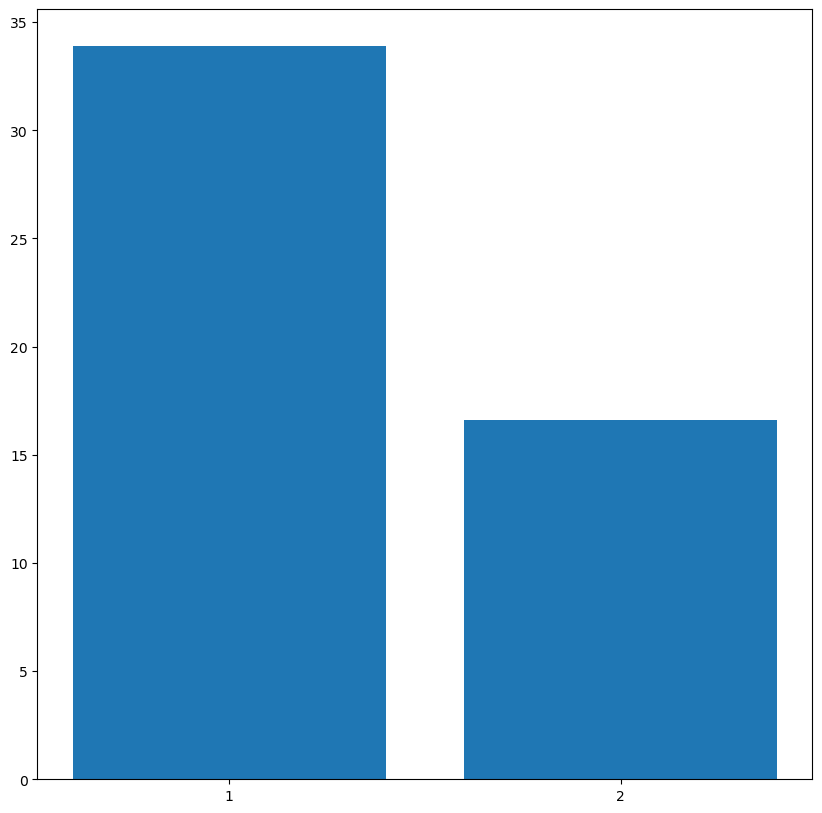

In [175]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()
#This code uses matplotlib to create a bar chart for PCA explained variance


In [176]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=3000, n_init=100, random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
    #This code calculates and stores the within-cluster sum of squares 

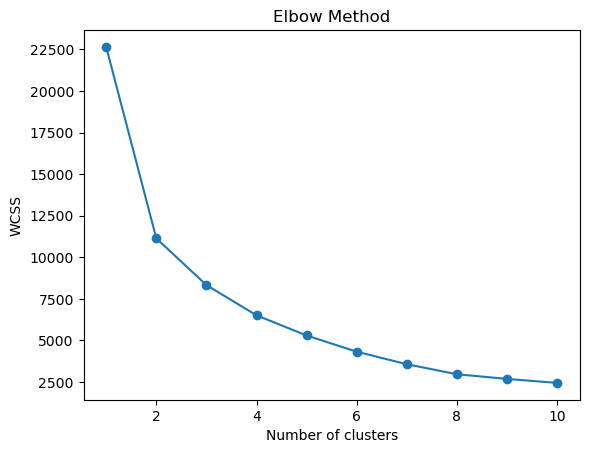

In [177]:
plt.plot(range(1, 11), wcss, marker="o")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#Visualizing the Elbow Method results to determine optimal cluster count in k-means

In [178]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
model = kmeans.fit(pca_df)

In [179]:
predicted_values = kmeans.predict(pca_df)

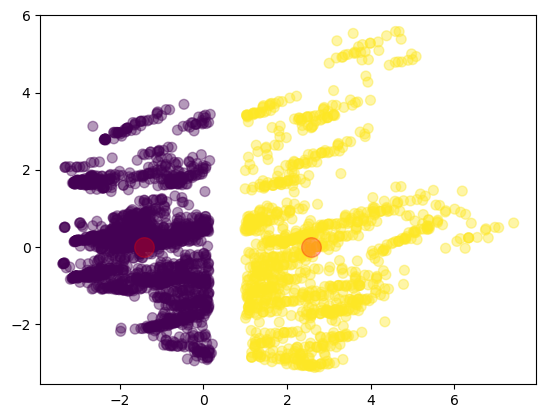

In [180]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], c= predicted_values, s= 50, alpha = 0.4  )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 200, c = 'red', alpha = 0.3)

In [181]:
df["Cluster"] = kmeans.labels_
from sklearn.metrics import silhouette_score
score = silhouette_score(pca_df, kmeans.labels_)
print("Silhouette score:", score)
# Assign cluster labels and compute silhouette score for K-means clustering

Silhouette score: 0.48517966104432697


In [182]:
print(classification_report(target, predicted_values))

              precision    recall  f1-score   support

           0       0.76      0.58      0.66      2655
           1       0.01      0.01      0.01       495

    accuracy                           0.49      3150
   macro avg       0.38      0.30      0.33      3150
weighted avg       0.64      0.49      0.56      3150



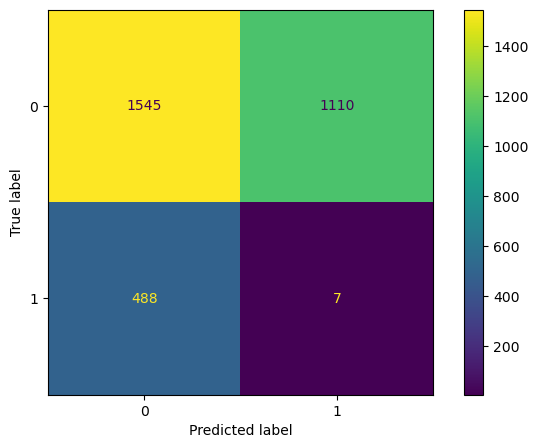

In [183]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
confusion_matrix(target, predicted_values),
display_labels=[0, 1],) 
cmp.plot(ax=ax)
plt.show();
#Visualizing a confusion matrix using matplotlib and scikit-learn's 